<a href="https://www.kaggle.com/code/utkarshx27/popular-baby-names-analysis?scriptVersionId=129057230" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/popular-baby-names/Popular_Baby_Names.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.metrics import edit_distance

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/popular-baby-names/Popular_Baby_Names.csv')
df

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
49504,2018,FEMALE,BLACK NON HISPANIC,Nala,10,40
49505,2018,FEMALE,BLACK NON HISPANIC,Royalty,10,40
49506,2018,FEMALE,BLACK NON HISPANIC,Sariyah,10,40
49507,2018,FEMALE,BLACK NON HISPANIC,Simone,10,40


In [4]:
top_5_names = df.loc[df['Rank'].nlargest(5).index, "Child's First Name"]   
print('Top 5 Names by Rank')
print(top_5_names.to_string(index=False, header=None))

Top 5 Names by Rank
  Lucien
  Hayden
Dashiell
   Imran
Giuseppe


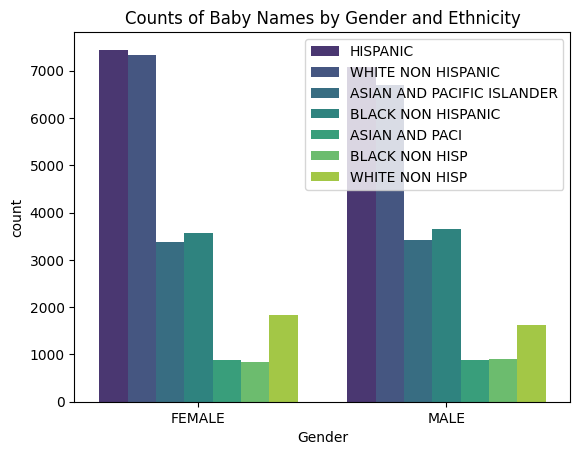

In [5]:
sns.countplot(x='Gender', hue='Ethnicity', data=df, palette='viridis')
plt.title('Counts of Baby Names by Gender and Ethnicity')
plt.legend(loc='upper right')
plt.show()

In [6]:
name1 = 'John'
name2 = 'Jon'
distance = edit_distance(name1.lower(), name2.lower())
print(f"Levenshtein distance between '{name1}' and '{name2}': {distance}")

Levenshtein distance between 'John' and 'Jon': 1


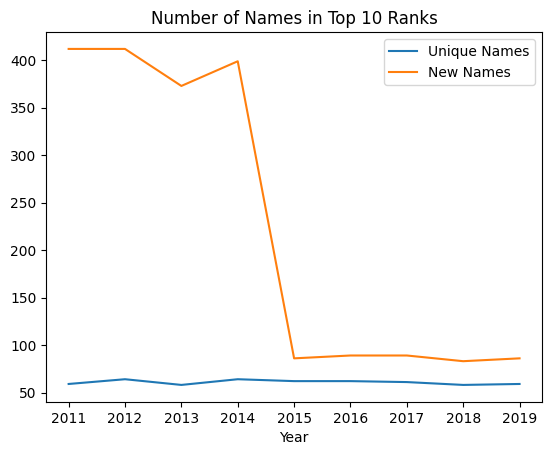

In [7]:
num_unique_top_10_names = df.loc[df['Rank'] <= 10].groupby('Year of Birth')['Child\'s First Name'].nunique()
new_top_10_names = df.loc[df['Rank'] <= 10].groupby('Year of Birth')['Child\'s First Name'].apply(lambda x: np.sum(x != x.shift()))
plt.plot(num_unique_top_10_names, label='Unique Names')
plt.plot(new_top_10_names, label='New Names')
plt.legend()
plt.title('Number of Names in Top 10 Ranks')
plt.xlabel('Year')
plt.show()

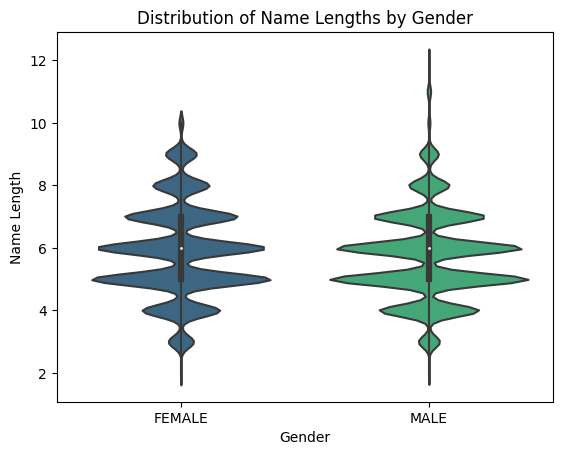

In [8]:
df['Name Length'] = df['Child\'s First Name'].apply(len)
sns.violinplot(x='Gender', y='Name Length', data=df, palette='viridis')
plt.title('Distribution of Name Lengths by Gender')
plt.show()

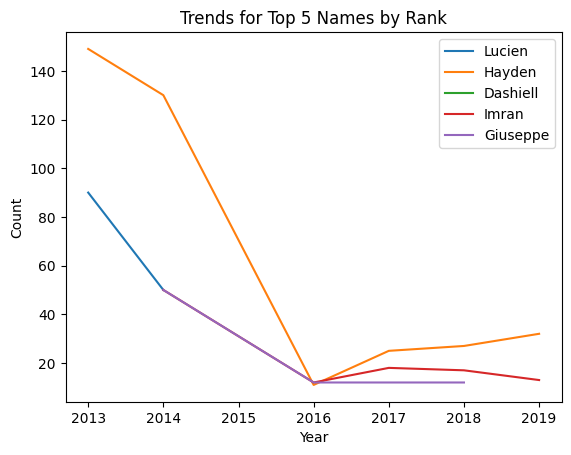

In [9]:
top_5_names = df.loc[df['Rank'].nlargest(5).index, "Child's First Name"]
name_counts_by_year = df.groupby(['Child\'s First Name', 'Year of Birth'])['Count'].sum()

for name in top_5_names:
    name_counts_by_year.loc[name].plot(label=name)

plt.title('Trends for Top 5 Names by Rank')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()